In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

In [2]:
def plot_data(x, mean, label, color):
    data = mean
    ax = sns.tsplot(data, condition=label, color=color)
    ax.set(xlabel='steps', ylabel='loss')


def draw(env, steps, test_steps, lr, fig_no):
    data_dir = f'../logs/{env}/lr_{lr}_bs_64_dim_100_hid_10_gamma_1_eps_10000_steps_{steps}/{test_steps}'
    save_path = f'{data_dir}/plot.pdf'




    optims = ['adam', 'sgd']
    # base_lrs = [1.0, 0.5, 0.1, 0.01, 0.001, 1e-4]
    base_lrs = [1.0, 0.5, 0.1, 0.01, 0.001, 1e-4]
    x = np.arange(steps)
    palette = sns.color_palette("husl",  n_colors=15)

    n = 0
    pm =  f'{data_dir}/meta_func_vals.npy'
    m = np.load(pm)

    fig = plt.figure(fig_no, figsize=(12,8))
    plt.ylim(-100, 100)
    plt.xlim(1, 201)
    if env == 'quadratic':
        data = np.load(f'{data_dir}/optimal_value.npy')
        ax = sns.tsplot(np.tile(data.reshape(-1, 1), (1, steps)), condition='optimal-value', color=palette[n])
        n+=1
    plot_data(x=x, mean=m, label='RL', color=palette[n])
    n+=1
    for opt in optims:
        for lr  in base_lrs:
            pm =  f'{data_dir}/opt_{opt}_lr_{lr}_func_vals.npy'
            m = np.load(pm)
            plot_data(x=x, mean=m, label=f'{opt}-{lr}', color=palette[n])
            n+=1

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    fig.savefig(save_path, bbox_inches='tight')      
    fig.show()


In [3]:

env = 'quadratic2'
steps_l = [200]
lr_l=[0.1, 0.01]


/zfsauton/home/yz6/miniconda3/envs/mypython3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/zfsauton/home/yz6/miniconda3/envs/mypython3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


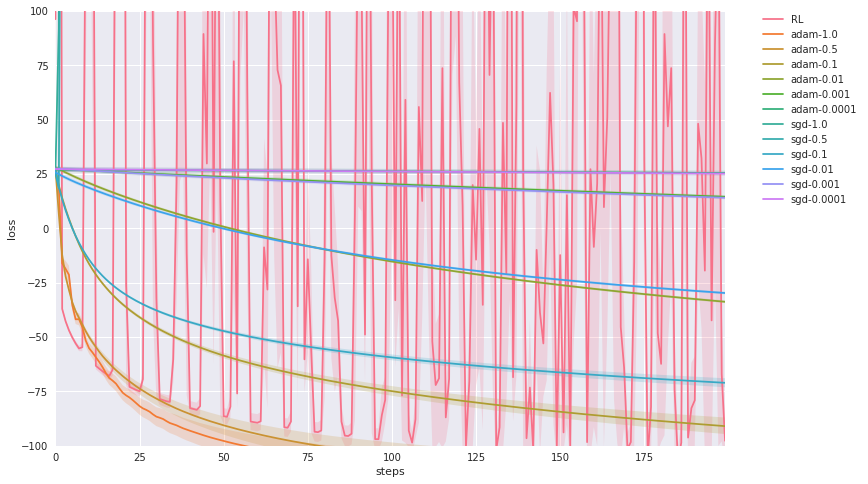

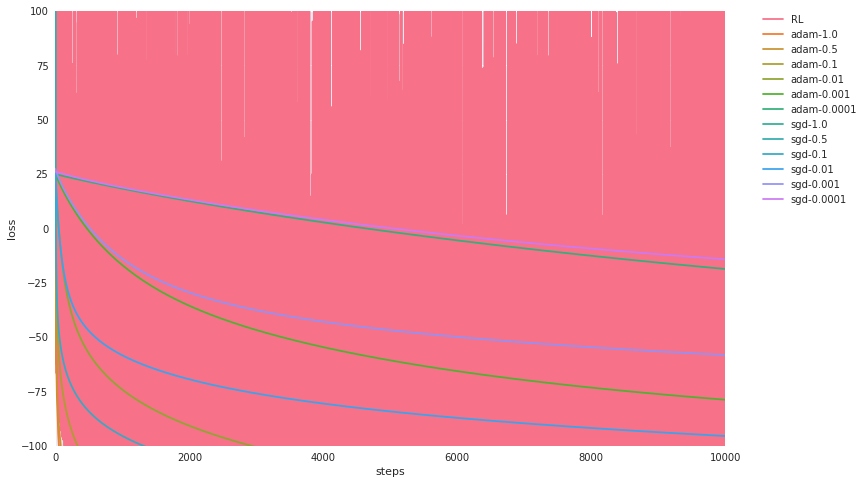

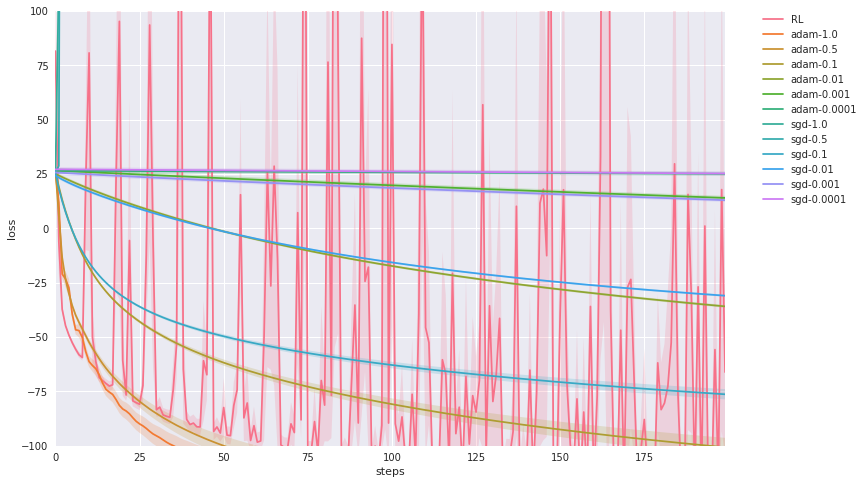

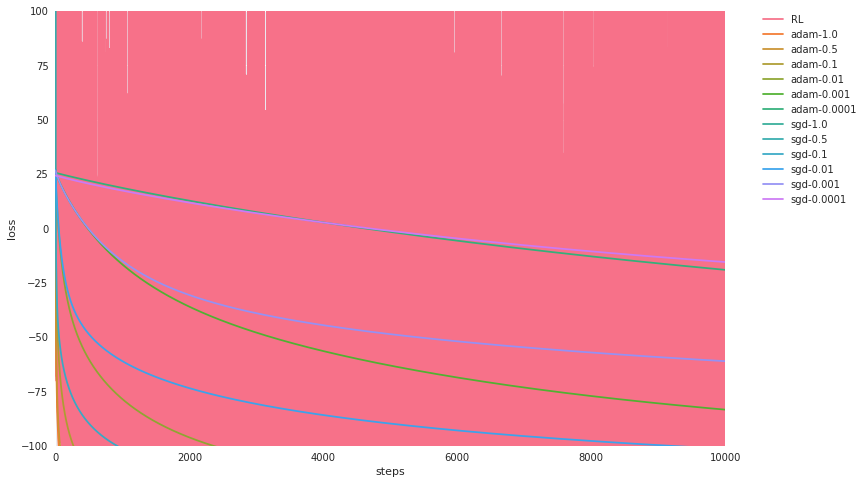

In [4]:
n=0
for steps in steps_l:
    for lr in lr_l:
        draw(env=env, steps=steps, test_steps=steps, lr=lr, fig_no=n)
        n+=1
#         draw(env=env, steps=steps, test_steps=1000, lr=lr, fig_no=n)
#         n+=1
        draw(env=env, steps=steps, test_steps=10000, lr=lr, fig_no=n)
        n+=1